<center><h1>Wojciech Sałapatek grupa 2b</h1></center>

***Zad1***

Korzystając metody analitycznej otrzymujemy:
$$\int_{0}^{1}e^{-2x}dx = [-2e^{-2x}]^{1}_{0} = -\frac{e^{-2} -1}{2} \approx 0.43233235838$$


In [15]:
import math
import scipy.integrate as sint
import scipy.stats as st
import scipy.optimize as op
import numpy as np

def f(x):
    return math.e**(-2*x)

def simple_rectangles(f ,a, b):
    return (b-a)*f((a+b)/2)

def simple_trapeze(f, a, b):
    return 0.5*(b-a)*(f(a)+f(b))

def simple_simpson(f, a, b):
    return (1/6)*(b-a)*(f(a)+4*f((a+b)/2) + f(b))

def cmplx(f, a, b, n, method):
    sum = 0
    start = a
    step = (b-a)/n
    while start < b:
        end = start + step
        sum += method(f, start, end)
        start += step
    return sum

def complex_trapeze(f, a, b, n):
    return cmplx(f, a, b, n, simple_trapeze)

def complex_simpson(f, a, b, n):
    return cmplx(f, a, b, n, simple_simpson)


ref = -(math.e**(-2) -1)/2
keys = ["prostokątów", "prostego wzoru trapezów", "prostego wzoru Simposna", "złożonego wzoru trapezów", "złożonego wzoru Simpsona", "Romberga", "quad"]
values = [simple_rectangles(f,0,1) - ref, simple_trapeze(f,0,1) - ref, simple_simpson(f,0,1) - ref, complex_trapeze(f,0,1,10) - ref, complex_simpson(f,0,1,10) - ref] 
romberg = sint.romberg(f, 0, 1, tol=1e-6)
quad = sint.quad(f, 0 ,1)
values.append(romberg - ref)
values.append(quad[0] - ref)
values = [abs(i) for i in values]
d = dict(zip(keys, values))
best = min(d, key=d.get)

print("Wartość całki obliczonej za pomocą metody analitycznej: {}".format(ref))
print("Wartość całki obliczonej za pomocą metody prostokątów: {}".format(simple_rectangles(f,0,1)))
print("Wartość całki obliczonej za pomocą prostego wzoru trapezów: {}".format(simple_trapeze(f,0,1)))
print("Wartość całki obliczonej za pomocą prostego wzoru simpsona: {}".format(simple_simpson(f,0,1)))
print("Wartość całki obliczonej za pomocą złożonego wzoru trapezów: {}".format(complex_trapeze(f,0,1,10)))
print("Wartość całki obliczonej za pomocą złożonego wzoru Simpsona: {}".format(complex_simpson(f,0,1,10)))
print("Wartość całki obliczonej za pomocą metody Romberga: {}".format(romberg))
print("Wartość całki obliczonej za pomocą metody quad: {}".format(quad[0]))
print("Najbardziej zblizony wynik do analitycznego daje: {}".format(best))

Wartość całki obliczonej za pomocą metody analitycznej: 0.43233235838169365
Wartość całki obliczonej za pomocą metody prostokątów: 0.36787944117144233
Wartość całki obliczonej za pomocą prostego wzoru trapezów: 0.5676676416183064
Wartość całki obliczonej za pomocą prostego wzoru simpsona: 0.4344755079870637
Wartość całki obliczonej za pomocą złożonego wzoru trapezów: 0.44607942849841425
Wartość całki obliczonej za pomocą złożonego wzoru Simpsona: 0.4445986675242176
Wartość całki obliczonej za pomocą metody Romberga: 0.43233235838943557
Wartość całki obliczonej za pomocą metody quad: 0.4323323583816936
Najbardziej zblizony wynik do analitycznego daje: quad


***Zad 2***

Obie metody sprawdzają się bardzo dokładnie, metoda Simpsona daje dokładniejdzy wynik.

In [16]:
def fun_trap(x):
    return complex_trapeze(st.norm.pdf, 0, x, 30) - 0.45

def fun_sim(x):
    return complex_simpson(st.norm.pdf, 0, x, 30) - 0.45

def f_prime(x):
    return st.norm.pdf(x)

solution_trap = op.newton(fun_trap, 0.5, fprime=f_prime)
solution_sim = op.newton(fun_sim, 0.5, fprime=f_prime)
ref = st.norm.ppf(0.95)

print(st.norm.cdf(solution_trap) - st.norm.cdf(0))
print(st.norm.cdf(solution_sim) - st.norm.cdf(0))
print("Wartośc referencyjna: {}".format(ref))
print("Rozwiązanie korzystajac ze wzoru złożonych trapezów: {}".format(solution_trap))
print("Rozwiązanie korzystajac z złożonego wzoru Simpsona: {}".format(solution_sim))
print("Bład bezwzgledny rozwiązania uzywając metody trapezów : {}".format(abs(ref - solution_trap)))
print("Bład bezwzgledny rozwiązania uzywając metody Simpsona : {}".format(abs(ref - solution_sim)))

0.450042501585
0.449999999843
Wartośc referencyjna: 1.6448536269514722
Rozwiązanie korzystajac ze wzoru złożonych trapezów: 1.645265860757231
Rozwiązanie korzystajac z złożonego wzoru Simpsona: 1.6448536254338821
Bład bezwzgledny rozwiązania uzywając metody trapezów : 0.0004122338057588326
Bład bezwzgledny rozwiązania uzywając metody Simpsona : 1.5175900536235076e-09


***Zad3***

Korzystajac z faktów: $a=\frac{dv}{dt}$ oraz $v=\frac{dx}{dt}$ i przyjmując:
przemieszczenie początkowe $x_{0}= 0$ oraz $t_{0}= 0$ otrzymujemy:
$$v(t)=v_{0} + \int_{0}^{t}a(t)dt$$
$$x(t)=\int_{0}^{t}v(t)dt$$

$a(t)$ interpolujemy używając punktow zarejstrowanych przez fizyka. <br/>
$v_{0}$ otrzymujemy rozwiązując równanie $v(4)= 0$ 
$$v_{0} = -\int_{0}^{4}a(t)dt$$
$$v_{0} \approx 6.460 [m/s]$$

Drogę hamowania obliczamy z gotowego wzoru na $x(t)$
$$s_{h} = x(4)$$
$$s_{h} \approx = 6.4700 [m]$$

Średnia prędkość w przedziale t = [0, 0.5]
$$v_{śr} = \frac{\Delta s}{\Delta t} = \frac{s_{0.5}}{0.5} \approx 5.2773 [\frac{m}{s}]$$

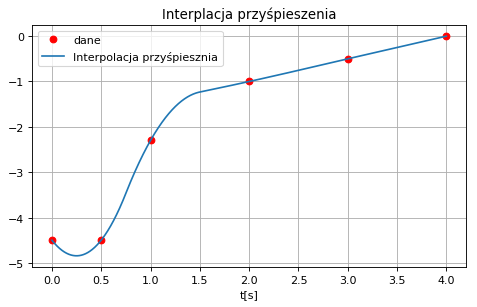

Wyznaczone v0: 6.459751773317121[m/s]
Wyznaczona droga hamowania: 6.469802818819925[m]
Droga przebyta po 0.5s: 2.638674645523809[m]
Wyznaczona średnia prędkość: 5.277349291047618[m/s]


In [17]:
import matplotlib.pyplot as plt
import scipy as sc

time = [0, 0.5, 1, 2, 3, 4]
acc = [-4.5, -4.5, -2.3, -1, -0.5, 0]
a_f = sc.interpolate.interp1d(time, acc, kind="quadratic")

def v(t, v0, a):
    return v0 + sint.romberg(a_f, 0, t, tol=1e-6)

args = np.arange(0,4, 1/2048)
fig = plt.figure(num=None, figsize=(7, 4), dpi=80, facecolor='w', edgecolor='k')
plt.title("Interplacja przyśpieszenia")
plot = fig.add_subplot(111)
plot.plot(time, acc, 'ro', label="dane")
plot2 = fig.add_subplot(111)
plot2.plot(args, a_f(args), label="Interpolacja przyśpiesznia")
plt.legend()
plt.xlabel("t[s]")
plt.ylabel("")
plot.grid(True)
plt.show()

v0 =  - sint.romberg(a_f, 0, 4, tol=1e-6)
sh = sint.romberg(v, 0, 4,tol=1e-6, args=(v0,a_f,))
s05 = sint.romberg(v, 0, 0.5, tol=1e-6, args=(v0,a_f,))
vsr = s05/(1/2)
print("Wyznaczone v0: {}[m/s]".format(v0))
print("Wyznaczona droga hamowania: {}[m]".format(sh))
print("Droga przebyta po 0.5s: {}[m]".format(s05))
print("Wyznaczona średnia prędkość: {}[m/s]".format(vsr))

***Zad 4***

Wyznaczony wzór na potrzebna długośc przyjmuje postać:
$$\int_{0}^{4.8}\sqrt{1 + (A\cdot \frac{2\pi}{T} \cdot cos(\frac{2\pi x}{T}))^{2}}dx$$
Analizując wykres zależności obliczonej długości od ilości podprzedziałów dla metod trapezów oraz Simpsona, można zauważyć, że dla $n<=24$ obserwujemy dużą rozbierzność wyników. 

Jest to spowodowane okresowością funkcji podcałkowej, z której korzystamy by obliczyć potrzebną długość. Dla $n<24$ długość podprzedziału jest wieksza od okresu. Dla $n=\frac{k*4.8}{T}$, czyli gdy okres jest wielokrotnością długości podprzedziału obserwujemy "anomalie" w wyznaczonej długości.

Rozwiązaniem tego problemu może być zwiększenie ilości podprzedziałów tak, że długość podprzedziału jest mniejsza od długości okresu i nie jest podzielna przez okres. Jeśli rozwiązanie to jest zbyt trudne obliczeniowo możemy obliczyć wartośc całiki dla jednego okresu a nastepnie zwielokrotnić otrzymany wynik przez ilość okresów w interesującym nas przedziale.

Wyznaczona potrzebdna długośc - metoda trapezów: 11.06348478089561
Wyznaczona potrzebdna długośc - metoda Simpsona: 11.063484780895678
Wyznaczona potrzebdna długośc - metoda Romberga: 15.825159885482952
Wyznaczona potrzebdna długośc - metoda quad: 11.05547510804942


C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


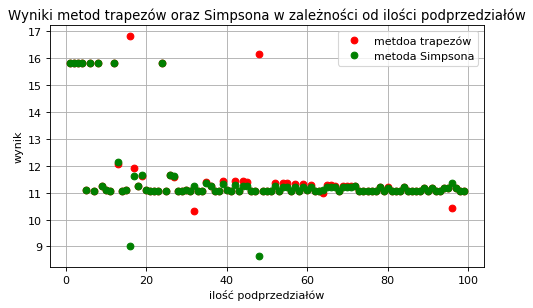

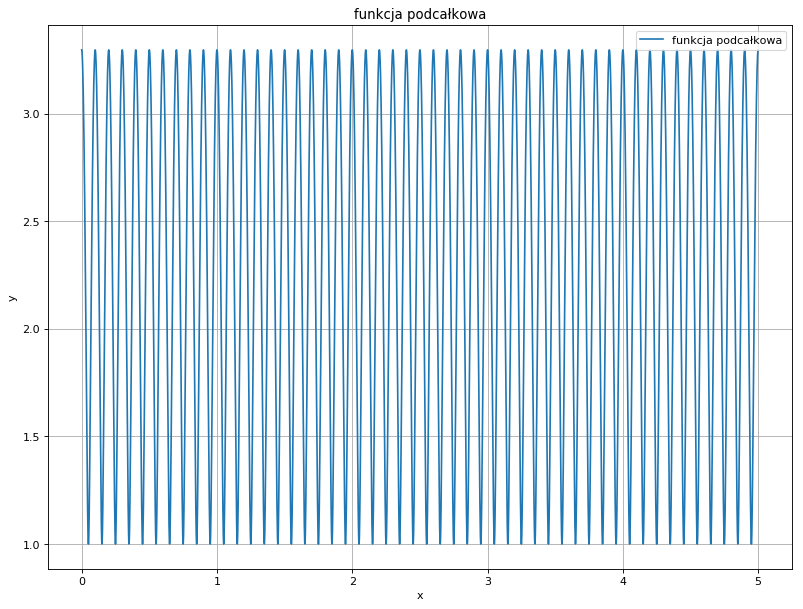


Wyznaczona potrzebdna długośc - metoda trapezów: 11.063484568291527
Wyznaczona potrzebdna długośc - metoda Simpsona: 11.063484843232777
Wyznaczona potrzebdna długośc - metoda Romberga: 15.825159885482954
Wyznaczona potrzebdna długośc - metoda quad: 11.063484774497757


In [18]:
def f(x):
    return math.sqrt(1 + (((0.1*2*math.pi)/(0.2))*math.cos((2*math.pi*x)/0.2))**2)


needed_trap = complex_trapeze(f, 0, 4.8, 50)
needed_sim = complex_simpson(f, 0, 4.8, 50)
needed_rom = sint.romberg(f, 0, 4.8, tol=1e-6)
print("Wyznaczona potrzebdna długośc - metoda trapezów: {}".format(needed_trap))
print("Wyznaczona potrzebdna długośc - metoda Simpsona: {}".format(needed_sim))
print("Wyznaczona potrzebdna długośc - metoda Romberga: {}".format(needed_rom))
print("Wyznaczona potrzebdna długośc - metoda quad: {}".format(sint.quad(f, 0, 4.8)[0]))

args = np.arange(1,100, 1)
trap_vals = [complex_trapeze(f, 0, 4.8, i) for i in args]
sim_vals = [complex_simpson(f, 0, 4.8, i) for i in args]
fig = plt.figure(num=None, figsize=(7, 4), dpi=80, facecolor='w', edgecolor='k')
plt.title("Wyniki metod trapezów oraz Simpsona w zależności od ilości podprzedziałów")
plot = fig.add_subplot(111)
plot.plot(args, trap_vals, 'ro', label="metdoa trapezów")
plot2 = fig.add_subplot(111)
plot2.plot(args, sim_vals,'go', label="metoda Simpsona")
plt.legend()
plt.xlabel("ilość podprzedziałów")
plt.ylabel("wynik")
plot.grid(True)
plt.show()

args = np.arange(0,5, 1/1024)
vals = [f(i) for i in args]
fig = plt.figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')
plt.title("funkcja podcałkowa")
plot = fig.add_subplot(111)
plot.plot(args, vals, label="funkcja podcałkowa")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plot.grid(True)
plt.show()

#sposób z obliczaniem całki tylko dla jednego okresu
needed_trap = complex_trapeze(f, 0, 0.2, 40)*24
needed_sim = complex_simpson(f, 0, 0.2, 40)*24
needed_rom = sint.romberg(f, 0, 0.2, tol=1e-6)*24
print()
print("Wyznaczona potrzebdna długośc - metoda trapezów: {}".format(needed_trap))
print("Wyznaczona potrzebdna długośc - metoda Simpsona: {}".format(needed_sim))
print("Wyznaczona potrzebdna długośc - metoda Romberga: {}".format(needed_rom))
print("Wyznaczona potrzebdna długośc - metoda quad: {}".format((sint.quad(f, 0, 0.2)[0])*24))